In [32]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pylab import *

### Data cleaning and structuring.

In [33]:
# Convert data to dataframes
lung_df1 = pd.read_csv(os.path.join("Resources", "CDC_Cancer1.csv"))
lung_df2 = pd.read_csv(os.path.join("Resources", "CDC_Cancer2.csv"))

# Combine dataframes into single dataframe
lung_df = lung_df1.append(lung_df2, ignore_index=True)

# Delete unnecessary columns
lung_df_01 = lung_df.drop(["Notes", "State Code", "Year Code", "Sex Code", "Race Code", "Age Group Code"], axis=1)
lung_df_01 = lung_df_01.rename(columns = {"Age Group Code":"Age Group"})

# find null values in our dataframe
lung_df_01.isnull().sum()

#dropped all the rows containing null values from the dataframe
lung_df_01=lung_df_01.dropna(subset=['State', 'Year','Sex','Race','Age Group','Deaths','Population','Crude Rate'])
lung_df_01 = lung_df_01.astype({"Year": int, "Deaths": int, "Population": int, "Crude Rate": int})

print(lung_df_01.info())
lung_df_01.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 61133 entries, 0 to 61183
Data columns (total 8 columns):
State         61133 non-null object
Year          61133 non-null int32
Sex           61133 non-null object
Race          61133 non-null object
Age Group     61133 non-null object
Deaths        61133 non-null int32
Population    61133 non-null int32
Crude Rate    61133 non-null int32
dtypes: int32(4), object(4)
memory usage: 3.3+ MB
None


,State,Year,Sex,Race,Age Group,Deaths,Population,Crude Rate
0,Alabama,2006,Female,American Indian or Alaska Native,< 1 year,0,131,0
1,Alabama,2006,Female,American Indian or Alaska Native,1-4 years,0,788,0
2,Alabama,2006,Female,American Indian or Alaska Native,5-9 years,0,1093,0
3,Alabama,2006,Female,American Indian or Alaska Native,10-14 years,0,1237,0
4,Alabama,2006,Female,American Indian or Alaska Native,15-19 years,0,1305,0



### Lung and bronchus cancer deaths for the entire United States 

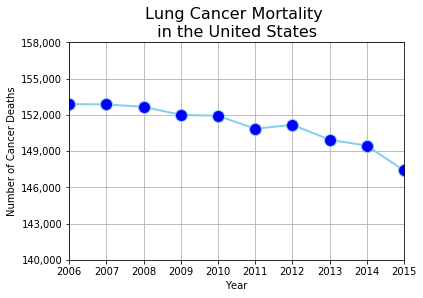

In [59]:
# Line graph- trend line of lung cancer mortality on a national level/nationwide over time from 2006-2015.


Group_By_Year_df = lung_df_01.groupby('Year')['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=12
                                                                   ,color='skyblue'
                                                                   ,linewidth=2)


Group_By_Year_df.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
yticks(np.arange(140000, 160000, step=3000))
plt.title('Lung Cancer Mortality \n in the United States ',fontsize = 16)
plt.xlabel('Year',fontsize = 10)
plt.ylabel('Number of Cancer Deaths',fontsize = 10)
plt.grid(True)
plt.show()




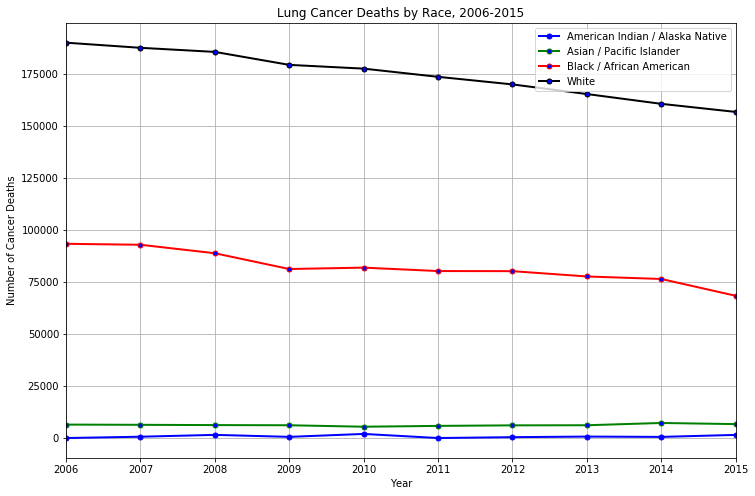

In [39]:
#Group data by Race
GroupBy_by_Race_df = lung_df_01.groupby('Race')

#Extract data into four seprate DataFrames based on race 
American_Indian_df = GroupBy_by_Race_df.get_group('American Indian or Alaska Native')
Asian_df = GroupBy_by_Race_df.get_group('Asian or Pacific Islander')                                              
African_American_df = GroupBy_by_Race_df.get_group('Black or African American')
White_df = GroupBy_by_Race_df.get_group('White')

plt.figure(figsize =(12,8))
American_Indian_df.groupby(['Year'])['Crude Rate'].sum().plot(x='Year',y='Crude Rate'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='blue'
                                                                   ,linewidth=2) 

Asian_df.groupby(['Year'])['Crude Rate'].sum().plot(x='Year',y='Crude Rate'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='green'
                                                                   ,linewidth=2)

African_American_df.groupby(['Year'])['Crude Rate'].sum().plot(x='Year',y='Crude Rate'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='red'
                                                                   ,linewidth=2)

White_df.groupby(['Year'])['Crude Rate'].sum().plot(x='Year',y='Crude Rate'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='black'
                                                                   ,linewidth=2)

plt.xlabel('Year',fontsize = 10)
plt.ylabel('Number of Cancer Deaths',fontsize = 10)
plt.title('Lung Cancer Deaths by Race, 2006-2015')
plt.grid(True)

plt.legend(('American Indian / Alaska Native', 'Asian / Pacific Islander', 'Black / African American','White'),
           loc='upper right')
plt.show()


<Figure size 576x432 with 0 Axes>

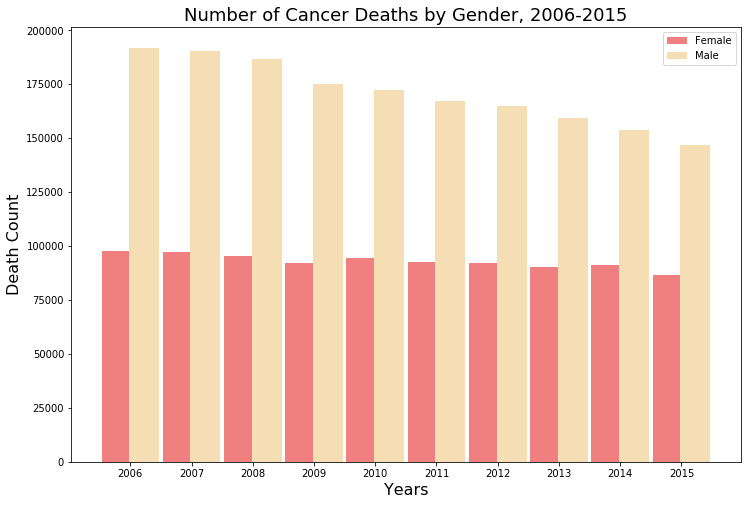

,femaleCount,maleCount
Year,,
2006,97903,191956
2007,97030,190428
2008,95434,186739
2009,92327,174991
2010,94589,172297
2011,92692,167033
2012,92034,164675
2013,90367,159491
2014,91019,153869


In [60]:
#Group data by gender
GroupBy_by_Gender_df = lung_df_01.groupby('Sex')

#Extract data into two seprate DataFrames based on gender
GroupBy_by_Female_df = GroupBy_by_Gender_df.get_group('Female')
GroupBy_by_Male_df = GroupBy_by_Gender_df.get_group('Male')  

#Group data by Year and Death per 100,000 people
Group_Fe_Yr_Dth=GroupBy_by_Female_df.groupby(['Year'])['Crude Rate'].sum()
Group_Ma_Yr_Dth=GroupBy_by_Male_df.groupby(['Year'])['Crude Rate'].sum()

#New Dictionary w/ year and corresponding male/female counts
dict={'femaleCount':Group_Fe_Yr_Dth,
      'maleCount'  :Group_Ma_Yr_Dth}
Fe_Ma_df =pd.DataFrame(dict)


plt.figure(figsize =(8,6))

#Positioning
barWidth = .45
r1 = np.arange(2006,2016,1)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize =(12,8))
ax = fig.add_subplot(111)
ax.bar(r1, Group_Fe_Yr_Dth,width=0.49,color='lightcoral',align='center')
ax.bar(r2, Group_Ma_Yr_Dth,width=0.49,color='wheat',align='center')
#plt.grid()
ax.set_xlabel('Years',fontsize = 16)
ax.set_ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Gender, 2006-2015',fontsize = 18)
plt.legend(('Female', 'Male'),loc='upper right')
plt.xticks(r1+barWidth/2,range(2006,2016))
   
plt.show()
Fe_Ma_df


### Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2006-2015

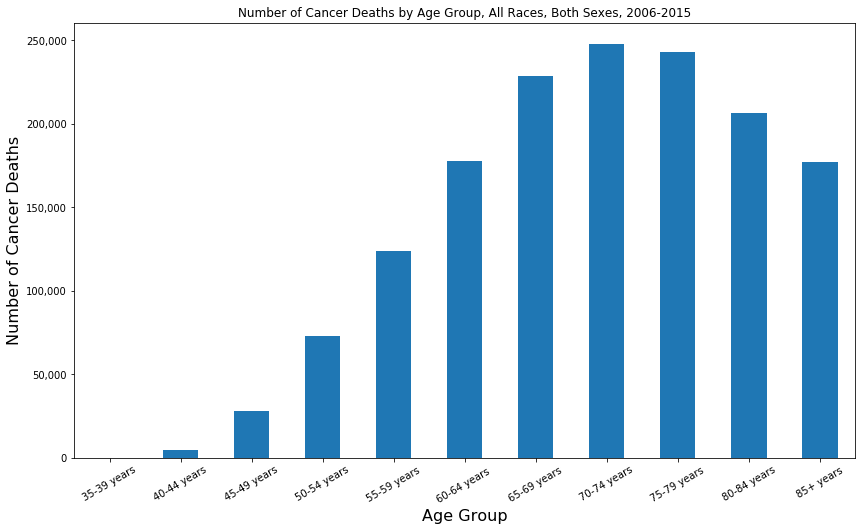

In [37]:
lung_df_02 = lung_df_01.copy()
# The death rate for age group below 35 is found to be ~ 0
# plot those records that have death rate > 0
lung_df_02=lung_df_02[lung_df_02['Deaths'] > 0].set_index('Age Group')

#Group data by Age and get the total number of deaths per age group
GroupBy_by_Age_df = lung_df_02.groupby('Age Group')['Deaths'].sum() 

#
plt.figure(figsize =(14,8))
Death_Count_Group_By_Age =GroupBy_by_Age_df.plot.bar(x='Age Group', y='Deaths', rot=30)
plt.xlabel('Age Group',fontsize = 16)  
plt.ylabel('Number of Cancer Deaths',fontsize = 16)
plt.title('Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2006-2015')
Death_Count_Group_By_Age.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid(False)
